# Component Separation Using Bayesian Methods



## Chapter 1 - Simple Test Case
Before we move on to any real data, let us take a step back and look at a couple ways to solve for parameters from a distribution. 

First let us draw 1000 samples from a Gaussian distribution and look at a histogram of the result. 

As a reminder, a Gaussian distribution for parameter $x$ with mean $\mu$ and standard deviation $\sigma$ is given by

\begin{equation}
p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}.
\end{equation}

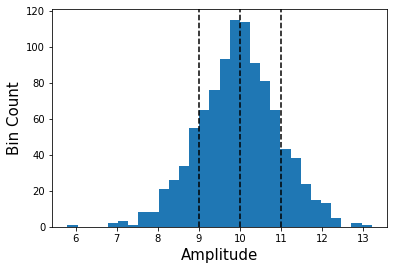

In [75]:
import numpy as np
import matplotlib.pyplot as plt

ndraws = 1000
mu     = 10.
sigma  = 1.

data = np.zeros(ndraws)
for i in range(ndraws):
    data[i] = np.random.normal(mu,sigma)

plt.hist(data,bins=30)
plt.xlabel('Amplitude',size=15)
plt.ylabel('Bin Count',size=15)
plt.axvline(mu,color='k',linestyle='--')
plt.axvline(mu-sigma,color='k',linestyle='--')
plt.axvline(mu+sigma,color='k',linestyle='--')
plt.show()

Now let us suppose we only have the `data` vector defined above, and want to find the mean value of that data. How do we go about that?

The first step is always to craft a data model. Let us switch to an observational standpoint. We start by assuming that the true value of the data $\mu'$ is a single value who's obserbed value has been obscured by some underlying Gaussian noise, i.e. $x = \mu' + n$ where $x$ is the data, and $n$ is some Gaussian noise. We will generalize this to the following equation, which ought to be baked into your memory

\begin{equation}
d = s + n
\end{equation}

where $d$ is the observed data, $s$ is the true underlying signal, and $n$ is again a noise term. This formalism is the basis of our component separation methods and will be expanded upon further. Down the road.

### Maximum-Likelihood Solution

Now that we have a simple data model, how does one go about actually determining the true underlying signal $s$? A good starting point is by finding what is called the maximum-likelihood solution, using maximum likelihood estimation (MLE). A cursory Google search for maximum likelihood estimation will provide a mix of math heavy resources (like Wikipedia), and some practical examples (like towardsdatascience). 

Here we will stick with a Gaussian assumption, i.e. that the noise inherent in the data has a Gaussian form. 

For any observed point $x_i$, the probability of observing that data point, given the underlying mean ($\mu$) and standard deviation ($\sigma$) of the distribution is given by

$p(x_i|\mu,\,\sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}$,

and the probability of observing say 3 data points $x_1$, $x_2$, and $x_3$ is given by 

$p(x_1,x_2,x_3|\mu,\,\sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x_1-\mu)^2}{2\sigma^2}}\times\frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x_2-\mu)^2}{2\sigma^2}}\times\frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x_3-\mu)^2}{2\sigma^2}}$.

Let us take all of our observations into account and condense our probability expression (the likelihood) to be

\begin{equation}
p(\vec{x}|\mu,\,\sigma) = {\displaystyle \prod_{i=1}^{1000}}\frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}
\end{equation}

From our Calculus experience, we may note that a sure fire way to determine the maximum or minimum of a function is by taking its derivative. However we can tell by looking at the above equation that taking the derivative of this thing will be a cumbersome operation.

Those versed in MLE will be quick to point out that taking the natural logarithm of the above expression gives us something nice to work with!

To be explicit, finding the maximum likelihood solution involves finding $\mu$ where
   
\begin{equation}
\frac{\partial \ln (p(\vec{x}|\mu,\,\sigma))}{\partial \mu} = 0.
\end{equation}

Before we move on, let us touch on a couple final pieces of information which will be important for the future. First let's consider the equation we are solving here $p(\vec{x}|\mu,\,\sigma)$. This equation reads "probability of the data given the parameters $\mu$ and $\sigma$. Since we already know the data, and don't know the values of $\mu$ and $\sigma$ a priori, it appears that this equation itself isn't very useful. However, the <span style="background-color:yellow">likelihood</span> of having $\mu$ and $\sigma$ given some data $\vec{x}$ is defined as

\begin{equation}
L(\mu,\,\sigma|\vec{x}) = p(\vec{x}|\mu,\,\sigma).
\end{equation}

Though the equations are equal, they ask different questions. The left-hand side is concerned about the likelihood of the parameters given the data, while the right-hand side is asking about what the probability of observing the data is, given the parameters. Hence the phrasing *Maximum Likelihood Solution*.

Finally, as we will see often later on, let us clearly define the log-likelihood as

\begin{equation}
\mathcal{L}(\mu,\,\sigma|\vec{x}) = \ln\,p(\vec{x}|\mu,\,\sigma)
\end{equation}

Compiled with help from [towardsdatascience.com](https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1).

Task 1: 

- Derive an expression $\mathcal{L}(\mu,\,\sigma|\vec{x})$. Hold on to this result as we will come back to it later.

- Derive an expression for $\frac{\partial \mathcal{L}(\mu,\,\sigma|\vec{x})}{\partial \mu} = 0$.

- Given the above expression for $\frac{\partial \mathcal{L}(\mu,\,\sigma|\vec{x})}{\partial \mu}$, find an expression for the mean of the data.

- Create a function which takes in the data and a noise ($\sigma$) estimate and returns the log-likelihood as a function of the mean. Plot the result.

- Create a function which solves for the ML solution given the data, and compare your answer to the value of $\mu$ given in the first cell.

<div style="background-color:#e6f3ff; padding:10px; border-style:
solid;; border-color:#0084ff; border-width:1px">
Solution:

\begin{align}
\ln (p(\vec{x}|\mu,\,\sigma)) =& \ln{\displaystyle \prod_{i=1}^{1000}}\frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}\\
=& {\displaystyle \sum_{i=1}^{1000} \ln \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}}\\
=& \ln \frac{1}{\sqrt{2 \pi \sigma^2}} {\displaystyle \sum_{i=1}^{1000} \ln e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}}\\
=& \ln \frac{1}{\sqrt{2 \pi \sigma^2}} {\displaystyle \sum_{i=1}^{1000} {-\frac{(x_i-\mu)^2}{2\sigma^2}}}\\
=& \ln \frac{1}{\sqrt{2 \pi \sigma^2}} {\displaystyle \sum_{i=1}^{1000} {-\frac{(x_i^2-2\mu x_i+\mu^2)}{2\sigma^2}}}\\
\end{align}
    
This result is nice in itself as an expression of the log-likelihood $\mathcal{L}$ for a Gaussian distribution.

Then taking the partial derivative of the above with respect to the mean gives

\begin{align}
\frac{\partial \ln (p(\vec{x}|\mu,\,\sigma))}{\partial \mu} =& \frac{\partial}{\partial \mu} \ln \frac{1}{\sqrt{2 \pi \sigma^2}}{\displaystyle \sum_{i=1}^{1000} {-\frac{(x_i^2-2\mu x_i+\mu^2)}{2\sigma^2}}}\\
=& \frac{\partial}{\partial \mu} {\displaystyle \sum_{i=1}^{1000} {-\frac{(x_i^2-2\mu x_i+\mu^2)}{2\sigma^2}}}\\
=& -\frac{1}{2\sigma^2} {\displaystyle \sum_{i=1}^{1000}\frac{\partial}{\partial \mu}(x_i^2-2\mu x_i+\mu^2)}\\
=& -\frac{1}{2\sigma^2} {\displaystyle \sum_{i=1}^{1000}-2x_i+2\mu}\\
=& \frac{1}{\sigma^2} {\displaystyle \sum_{i=1}^{1000}x_i-\mu}\\
=& 0
\end{align}

This gives us a nice expression for the $\mu$,

\begin{equation}
\mu = {\displaystyle \frac{1}{1000}\sum_{i=1}^{1000} x_i},
\end{equation}
which should not be a surprising result as the estimate of the mean is just the average of all of the samples.
</div>

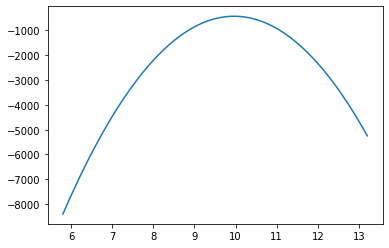

9.964338258265276


In [76]:
def return_log_likelihood(data,sigma):
    samples = np.shape(data)[0]
    
    # Make a grid of uniform possible mean values
    mu_grid = np.linspace(np.min(data),np.max(data),1000)
    
    # Initialize the lnL arary
    lnL = np.zeros(1000)
    
    # Calculate
    for i in range(1000):
        for j in range(samples):
            lnL[i] += np.log(1/(np.sqrt(2*np.pi*sigma**2)))*(data[j]-mu_grid[i])**2/(2*sigma**2)

    return mu_grid,lnL
    
# Get the values
x, lnL = return_log_likelihood(data,sigma)
# Plot
plt.plot(x,lnL)
plt.show()

def solve_for_ML(data,sigma):
    samples = np.shape(data)[0]
    
    # Very Fortran-y, slow method:
    amplitude = 0
    for i in range(samples):
        amplitude += data[i]
        
    amplitude = amplitude/samples
    
    return amplitude

print(solve_for_ML(data,sigma))

### Multi-frequency example

As we will see further on, determing the mean of an observable can be aided by (or in practice requires) the addition of multiple data points. As we move more towards a realistic example, we will say that we have observations at multiple frequencies. For a simple example, let's consider some observable which scales linearly with frequency. 

Let's create a new data set, where our observable has a mean value $a_{obs} = \mu$, and each observation frequency has its own noise characterisitic $n_{\nu}$.

When carrying out this multi-frequency analysis, we need to determine a reference frequency $\nu_{\rm ref}$, at which we evaluate the recovered amplitude $a_{obs}$.

Therefore, our new data model will be written as

$d_{\nu} = a_{obs}(\nu/\nu_{\rm ref}) + n_{\nu}$.

In [77]:
# New variables
nfreq  = 5
nus    = np.asarray([10.,20., 30.,40.,50.])
sigmas = np.asarray([1., 1.5, 1.25, 2., 0.75])

# Remake our data array
data   = np.empty((ndraws,nfreq))

# Reference frequency
nu_ref = 20.

def gen_spectrum(amplitude,frequency,reference):
   return amplitude*(frequency/reference)

for i in range(ndraws):
        for j in range(nfreq):
            data[i][j] = gen_spectrum(mu,nus[j],nu_ref)+np.random.normal(0.0,sigmas[j])


What does this data look like for us?

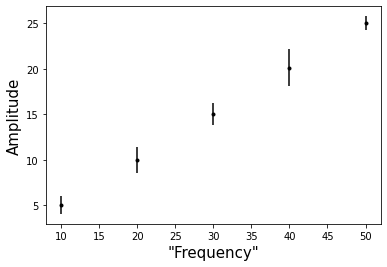

In [78]:
data_mean  = np.empty(nfreq)
data_error = np.empty(nfreq)
for j in range(nfreq):
    data_mean[j]  = np.mean(data.T[j])
    data_error[j] = np.std(data.T[j])
    
plt.errorbar(nus,data_mean,yerr=data_error,fmt='.',color='k')
plt.xlabel('"Frequency"',size=15)
plt.ylabel('Amplitude',size=15)
plt.show()

We can see that it would be simple to draw a straight line through the points, though many straight lines may fit the through all of the error bars. It is vital that we make an estimate of the *best* fit to the data, not just a fit.

Task 2:

- Generalize the `return_log_likelihood` function to work for the multi-frequency data and plot $\mathcal{L}(a_{obs}|\boldsymbol d)$ as a function of $a_{obs}$.

- Generalize the `solve_for_ML` function to work for the multi-frequency data and find the ML value of $a_{obs}$.


# Interjection - Some Important Information

## Generalization

Up until now we have taken a very simple example, where we have a data vector containing samples, and we find the MLS. Before we move to drawing samples from noisy data, we will define some more general nomenclature. Our original data model looked something like

\begin{equation}
d = s + n.
\end{equation}

We then expanded the actual signal into an amplitude and a frequency scaling

\begin{equation}
s = a_{obs}(\nu/\nu_{\rm ref}).
\end{equation}

This expansion of the signal term can be generalized in the following way

\begin{equation}
s = Ta,
\end{equation}

where $T$ is a matrix containing the scaling relation information (in this simple case $T=(\nu/\nu_{\rm ref})$), and $a$ is a vector corresponding to the amplitudes we are looking for $a=a_{ obs}$.

In essence, by finding the ML solution, we are solving the equation

\begin{equation}
(T^t N^{-1} T)a = T^t N^{-1} d,
\end{equation}

where $N^{-1}$ is the noise covariance matrix.

To be explicit, through the remainder of this notebook we will be looking and multi-frequency observations (vital in Cosmological Component Separation) and aim to solve for the true signal sky signal $s_{\nu}$ with the data model

\begin{equation}
d_{\nu} = s_{\nu} + n_{\nu},
\end{equation}

by solving the linear equation  

\begin{equation}
{\displaystyle \sum_{\nu}(T_{\nu}^t N_{\nu}^{-1} T_{\nu})a = \sum_{\nu}T_{\nu}^t N_{\nu}^{-1} d_{\nu}}.
\end{equation}

This equation will be expanded upon to include sampling and prior terms throughout this notebook. 


Note that when we move to more complex systems (many data sets with many pixels), filling and multiplying these matricies can be very expensive both computationally and for memory usage. A student interested in should read "An Introduction to the Conjugate Gradient Method withouth the Agonizing Pain" by Jonathan Shewchuk. It is excellent. Additionally, Numerical Recipes is always your friend when trying to solve complex linear systems computationally.



## Bayes Theorem

Before getting too far into the weeds here, we will introduce Bayes' Theorem as well as a practical definition for our purposes. Given a set of parameters $\vec{\omega} = \{\omega_1,...,\omega_k\}$, we will define the posterior distribution of $\boldsymbol \omega$ with respect to the data as 

\begin{equation}
P(\vec{\omega}\mid\boldsymbol{d}) = \frac{P(\boldsymbol{d} \mid \vec{\omega}) P(\vec{\omega})}{P(\boldsymbol{d})} \propto \mathcal{L}(\vec{\omega}) P(\vec{\omega}),
\end{equation}
where $ P(\boldsymbol{d}\mid\vec{\omega}) \equiv \mathcal{L}(\vec{\omega})$ is the likelihood function (as we have talked about above), $P(\vec{\omega})$ is the prior, and $P(\boldsymbol{d})$ is a normalization factor which we disregard here as it is independent of the parameters $\vec{\omega}$.

# Chapter 2 - Sampling Methods

In Chapter 1 we have simply drawn Gaussian samples of the data using `numpy`, having already known the mean and standard deviation of our data. In map-space analysis, we work with sky maps that are characterized by a total sky signal amplitude $s_{\nu}$, with an estimate of the noise $n_{\nu}$, giving us our data

\begin{equation}
d_{\nu} = s_{\nu} + n_{\nu}.
\end{equation}

This has been stated before and will be stated again in hopes of making you see the above equation when you close your eyes. We now wish to sample for $s_{\nu}$, the *true* sky signal, seeing as we know the data $d_{\nu}$ and have an estimate of the noise $n_{\nu}$.

Here we introduce three methods which we can use for sampling parameters. The Metropolis and Metropolis-Hastings methods are broadly used in MCMC methods and will be introduced here. These methods are usable in the general sense. Inversion Sampling is also introduced, which is used in the Commander/Cosmoglobe framework for sampling non-linear parameters, i.e., spectral indices. Finally from a Gaussian distribution is introduced. This is a core method to learn for sampling linear parameters and will be expanded upon in the next Chapter to the multi-variate case. In the Cosmoglobe/Commander framework this method is used to sample for Galactic foreground amplitudes.

### Metropolis and Metropolis-Hastings Methods

The Metropolis method is by far the most well-known of all of the MCMC sampling methods due to it's ease of implementation, tunability, and effectiveness. The Metropolis and Metropolis-Hastings algorithms are effective as all samples with a higher likelihood are accepted, while some samples with lower likelihoods will be accepted from time to time (this can be helpful to avoid becoming stuck around a local likelihood peak). 

Let us say we wish to sample for some parameter $\omega$. Let $\omega_j$ represent te $j$th sample of $\omega$ in a Markov chain. We also need to define a stochastic proposal probablility distribution, $T(\omega_{j+1}\mid \omega_{j})$, with which we tune in order to help with parameter convergence. In the Metropolis method, the proposal distribution is symmetric, i.e., $T(\omega_{j+1}\mid \omega_{j})=T(\omega_{j}\mid \omega_{j+1})$. In the Metropolis-Hastings method, this proposal distribution need not be symmetric.

The next thing we need to define is the acceptance criterion, which tells us which samples we will accept and which ones we will not. This acceptance criterion is defined by the ratio of the densities, which is given by the ratio of the posterior probabilities as defined by Bayes' theorem ($\frac{P(\boldsymbol d \mid \omega_{j+1})}{P(\boldsymbol d \mid \omega_{j})}$). If a prior is used to inform our sampling, this ratio is weighted by the ratio of the prior probabilities. Therefore our total definition of the acceptance probability $q$ is defined as

\begin{equation}
q = \frac{P(\boldsymbol d \mid \omega_{j+1})}{P(\boldsymbol d \mid \omega_{j})}\frac{P(\omega_{j+1})}{P(\omega_j)}.
\end{equation}

With these defined, we can now outline the algorithm itself. The algorthim is given by:

1. Initialie chain at some parameter value $\omega_0$.
2. Draw a random sample from the proposal probability distribution, i.e., $\omega_{j+1} \leftarrow T(\omega_{j+1}\mid\omega_j)$.
3. Compute the acceptance probability $q$.
4. Draw a random number $\eta$ from a uniform distribution $U[0,1]$.
5. Accept the proposed $\omega_{j+1}$ if $\eta < q$. Otherwise, set $\omega_{j+1} = \omega_{j}$.
6. Repeate steps 2-5 until convergence.

### Inversion sampling
Now that we have sampled the two amplitude parameters, we want to sample spectral parameters, which do not depend linearly on the data $d$, and are not Gaussian distributions, hence demand a different approach. 
To sample these two conditional distributions, we employ the "inversion sampler", which is completely general and works for all univariate distributions.
In our case, we have the distribution
\begin{align}
  P(\beta\mid d, a) &\propto P(d\mid a, \beta) P(\beta)\\
  &\propto \left[\prod_{\nu}
    \mathrm \exp\left(-\frac{1}{2}\left(d_{\nu}-T(\beta)a\right)^t N_{\nu}^{-1}\left(d_{\nu}-T(\beta)a\right)\right)\right]P(\beta).
\end{align}

Using this for P(x) we can sample using the inversion sampler by:
1. Compute $P(x)$ over a grid in $x$, making sure to probe the tails to sufficient accuracy.
2. Compute the cumulative probability distribution, ${F(x) = \int_{-\infty}^{x} P(x')\,\mathrm dx'}$.
3. Draw a random uniform variate, $\eta \sim U[0,1]$.
4. Solve the nonlinear equation $\eta = F(x)$ for $x$.

### Sampling a Gaussian
We may write $d = Ta+n = f(\omega)\cdot A + n$ where $\omega$ is the set of spectral indices (such as $\beta_{\rm s}$ or $T_{\rm d}$ for dust).
If we rewrite this and assume that the noise is gaussian $n = d - Ta$ we can express the distribution as
\begin{align}
P(a\mid d, \omega\setminus a) &\propto P(d\mid\omega)P(a)\\
  &\propto P(d\mid a)P(a)\\
  &\propto \left[\prod_{\nu} \exp\left(-\frac{1}{2}(d_{\nu}-T_{\nu}a)^t N_{\nu}^{-1}(d_{\nu}-T_{\nu}a)\right)\right]\cdot P(a)
\end{align}
which can be sampled by solving for $a$ in 
$$\biggl(S^{-1} + \sum_{\nu}T^t_{\nu}N_{\nu}^{-1}T_{\nu}\biggr)\,a = \sum_\nu T_{\nu}^t N_\nu^{-1}d_{\nu}+\sum_\nu T_{\nu}^t N_\nu^{-1/2}m_{\nu} + \sum_{\nu}T_{\nu}^tN_{\nu}^{-1/2}\eta_{\nu} + S^{-1/2}\eta_{0},$$
where S is a prior standarad deviation, N is the noise, m is the prior mean, and $\eta$ are random normal values. For a full explanation on this, look at BeyondPlanck 1, appendix 2. 

Note here that the simplified case (no prior) 

\begin{equation}
\biggl(\sum_{\nu}T^t_{\nu}N_{\nu}^{-1}T_{\nu}\biggr)\,a = \sum_\nu T_{\nu}^t N_\nu^{-1}d_{\nu} + \sum_{\nu}T_{\nu}^tN_{\nu}^{-1/2}\eta_{\nu},
\end{equation}

is the same equation at the end of the previous section with an additional sampling term.

We can also think of the above equation as 

\begin{equation}
a = \biggl(\sum_{\nu}T^t_{\nu}N_{\nu}^{-1}T_{\nu}\biggr)^{-1}\sum_\nu T_{\nu}^t N_\nu^{-1}d_{\nu} + \biggl(\sum_{\nu}T^t_{\nu}N_{\nu}^{-1}T_{\nu}\biggr)^{-1}\sum_{\nu}T_{\nu}^tN_{\nu}^{-1/2}\eta_{\nu},
\end{equation}
which is nice for the most simple cases.



Task 3: 
- Create implementations for each of these sampling algorithms to sample for the amplitude of the data set defined in the cell below (no priors)
- Plot chains for each of these sampling algorithms
- Plot histograms of the samples for each of the algorithms

In [57]:
global nbands

nbands      = 4
newamp      = 5.0
frequencies = np.asarray([10.,40.,70.,100.])
ref_freq    = 40.
noise       = np.asarray([0.75, 1.25, 2.0, 0.5])

data        = gen_spectrum(newamp,frequencies,ref_freq)+np.random.normal(0.0,noise)


def eval_loglikelihood(data,noise,spectrum,amplitude,frequencies):
    return lnl

def metropolis_sample(data,noise,spectrum,amplitude,frequencies,niter):
    samples    = np.zeros(niter)
    amp_sample = amplitude
    # Define the step length of the proposal distribution
    #step_size =
    
    # Evaluate the inital likelihood P(data|amp_sample)
    # lnL_old = eval_loglikelihood(data,noise,spectrum,amp_sample)
    # We will adopt a Gaussian distribution for our proposal distribution
    for i in range(niter):
        sample = amp_sample + np.random.normal(0.0,step_size)
        
        # Evaluate the probability of new sample
        
        # Calculate the ratio of the likelihoods
        
        # Calculate acceptance probability
        
        # If q >= U[0,1] accept, else, try again
        
        # Save sample so we can look at the chain afterwards
        samples[i] = amp_sample
    
    return samples

def inversion_sample(data,noise,spectrum,xs,frequencies,niter):
    samples = np.zeros(niter)

    # Compute P(x) over a grid in x ^^(xs)
    
    # Compute the cumulative probability distribution
    
    for i in range(niter):
        # draw a random number
        eta        = np.random.uniform(0,np.max(Fx))

        # Find the value of the parameter which corresponds to the random number (i.e. solve for x where eta = F(x))

    return samples

def gaussian_sample(data,noise,spectrum,frequencies,niter):
    # In this single pixel, single foreground case, the matrix T_nu is given
    # by the spectrum at each frequency, as we attempted to described previously 
        
    # Compute the static parts of the equation (no eta)

    # For each iteration draw a random normal for each entry of eta
    for i in range(niter):
        for j in range(nbands):
            eta[j] = np.random.normal(0.0,1.0)    
        # Compute the sampling portion and save the sample
        
    return samples

<div style="background-color:#e6f3ff; padding:10px; border-style:
solid;; border-color:#0084ff; border-width:1px">
    
### Solution

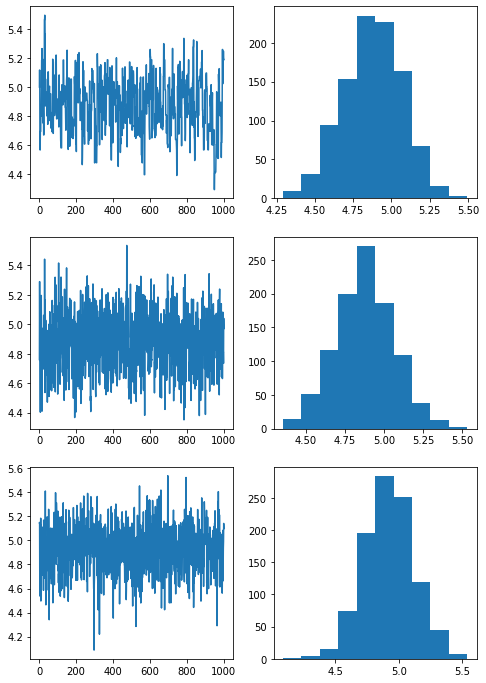

In [56]:
from scipy.interpolate import interp1d

def new_spectrum(frequency):
    return (frequency/ref_freq)

def eval_loglikelihood(data,noise,spectrum,amplitude,frequencies):
    lnl = 0.0
    for i in range(len(frequencies)):
        lnl += -0.5*(data[i]-amplitude*spectrum(frequencies[i]))**2/(noise[i]**2)
    return  lnl
    
def metropolis_sample(data,noise,spectrum,amplitude,frequencies,niter):
    samples = np.zeros(niter)
    
    amp_sample = amplitude
    # Define the step length of the proposal distribution
    step_size = 0.25
    
    # Evaluate the inital likelihood P(data|amp_sample)
    lnl_old = eval_loglikelihood(data,noise,spectrum,amp_sample,frequencies)
    
    # We will adopt a Gaussian distribution for our proposal distribution
    for i in range(niter):
        sample = amp_sample + np.random.normal(0.0,step_size)
        
        # Evaluate the probability of new sample
        lnl_new = eval_loglikelihood(data,noise,spectrum,sample,frequencies)
    
        # Calculate the ratio of the likelihoods
        ratio = lnl_new - lnl_old
        
        # Calculate acceptance probability
        q = min(1.0,np.exp(ratio))
        
        # If q >= U[0,1] accept, else, try again
        if q >= np.random.uniform(0,1):
            amp_sample = sample
            lnl_old    = lnl_new
            
        # Save sample so we can look at the chain afterwards
        samples[i] = amp_sample
        
    return samples

def inversion_sample(data,noise,spectrum,xs,frequencies,niter):
    samples = np.zeros(niter)

    
    # Compute P(x) over a grid in x ^^(xs)
    P = np.zeros(len(x))
    P = np.exp(eval_loglikelihood(data,noise,spectrum,xs,frequencies))
    
    # Compute the cumulative probability distribution
    dx = xs[1]-xs[0]
    Fx = np.cumsum(P*dx)
    
    for i in range(niter):
        # draw a random number
        eta        = np.random.uniform(0,np.max(Fx))
        c1         = min(xs); c2 = max(xs)
        
        # Find the value of the parameter which corresponds to the random number (i.e. solve for x where eta = F(x))
        f          = interp1d(Fx, xs, bounds_error=False, fill_value=(c1,c2))
        samples[i] = f(eta)
    return samples

def gaussian_sample(data,noise,spectrum,frequencies,niter):
    # In this single pixel, single foreground case, the matrix T_nu is given
    # by the spectrum at each frequency, as we attempted to described previously
    
    samples = np.zeros(niter) 
    eta     = np.empty(nbands)
    T_nu    = spectrum(frequencies)    
        
    # Compute the static parts of the equation (no eta)
    a11     = sum(data*T_nu/noise**2)
    a2      = sum(T_nu/noise**2*T_nu)

    # For each iteration draw a random normal for each entry of eta
    for i in range(niter):
        for j in range(nbands):
            eta[j] = np.random.normal(0.0,1.0)    
        # Compute the sampling portion and save the sample
        a12 = sum(T_nu/noise*eta)
        samples[i] = (a11+a12)/a2
        
    return samples

samples_metrop = metropolis_sample(data,noise,new_spectrum,5.0,frequencies,1000)
samples_invers = inversion_sample(data,noise,new_spectrum,np.linspace(1.0,10.0,100),frequencies,1000)
samples_gauss  = gaussian_sample(data,noise,new_spectrum,frequencies,1000)
x   = np.linspace(1,1000,1000)


fig, ax = plt.subplots(3,2,figsize=(8,12)) 
ax[0][0].plot(x,samples_metrop); ax[0][1].hist(samples_metrop)
ax[1][0].plot(x,samples_invers); ax[1][1].hist(samples_invers)
ax[2][0].plot(x,samples_gauss);  ax[2][1].hist(samples_gauss)
plt.show()
            

# Chapter 3 - A Step Closer to the Microwave Sky - Introducing More Foregrounds

In this chapter we will simulate a simplified example of the Microwave Sky. We will consider a single-pixel example that includes the CMB, synchrotron, and thermal dust radiation, with frequencies similar to that of the Planck satellite. 

# Simulate a Single Pixel Data Set

Let's begin by first importing a couple useful functions and constants. Here we will provide two SEDs with which we will use to simulate some sky data. You will be asked to pick another foreground spectrum (or come up with your own) to code up.

In [11]:
# Constants
kb   = 1.38e-23      # Boltzmanns constant
Tcmb = 2.7255        # CMB temperature
h    = 6.626e-34     # Plancks constant

# Calculates synchrotron value for given input frequency and parameters
def synch_spec(A_synch, b_synch, synch_curv, synch_freq, synch_ref):
    return float(A_synch*((synch_freq/synch_ref)**(b_synch+synch_curv*np.log(synch_freq/synch_ref))))

# Calculates dust value for given input frequency and parameters
def dust_spec(A_dust, b_dust, T_dust, dust_freq, dust_ref):
    return float(A_dust*((dust_freq/dust_ref)**(b_dust + 1.)))* \
        (np.exp(h*dust_ref*1.0e9/(kb*T_dust))-1.)/ \
        (np.exp(h*dust_freq*1.0e9/(kb*T_dust))-1.)

# Unit conversion between Rayleigh–Jeans units and cmb units
def unit_conv(frequency):
    xx = h*frequency*1.0e9/(kb*Tcmb)
    return xx**2*np.exp(xx)/((np.exp(xx)-1.)**2)

## Simulated sky data
Now we can simulate our data using this sky model for a given set of frequencies. Below we set the model parameters, the set of frequencies, the level of noise for each frequency and which frequency we use as pivot frequency (reference frequency) for dust and syncrotron. 

We have added all the Planck frequencies although not all of them were sensitive to polarization. Feel free to add the frequencies and sensitivities from your favourite experiment.

In [9]:
#Pixel size. Small number => large pixels => little noise pr pixel
nside = 64
#Frequency bands for Planck
freq = np.array([30., 44., 70., 100., 143., 217., 353., 545., 857.])
#Noise level pr pixel, pr frequency
sigma = np.array([1.2, 2.7, 3.2, 5.6, 2.1, 3.8, 1.3, 2.9, 1.7])*nside/512 
# Choose pivot frequencies
synch_ref = freq[0]   #Pivot/reference frequency synchrotron
dust_ref = freq[-3]   #Pivot frequency dust

#Model parameters for given pivot frequencies
Acmb   = 2.00    # CMB amplitude
As     = 12      # Synchrotron amplitude at the reference frequency
Betas  = -3.1    # Synchrotron beta (spectral index)
Csynch = -0.39   # Synchrotron curvature (set to zero if you do not want to include it)
Ad     = 8       # Dust amplitude at the reference frequency
Betad  = 1.9     # Dust beta (spectral index)
Tdust  = 19.6    # Dust temperature
names  = (["Acmb", "As", "Betas", "Csynch", "Ad", "Betad", "Tdust"])
names_plot  = (['$A_{cmb}$', '$A_s$', r'$\beta_s$', '$C_s$', '$A_d$', r'$\beta_d$', '$T_d$'])
param_in = np.array([Acmb, As, Betas, Csynch, Ad, Betad, Tdust])

# empty arrays for storing the data model for each frequency band
cmb   = np.empty(np.size(freq)) 
synch = np.empty(np.size(freq))
dust  = np.empty(np.size(freq))
data  = np.empty(np.size(freq))

print ("freq  | ","cmb   | ", "synch | ", "dust  | ", "data")
#Generate our data set for each frequenxy
for i in range(np.size(freq)):
    # Make CMB data set
    cmb[i] = Acmb*unit_conv(freq[i])
    # Synchrotron data
    synch[i] = synch_spec(As, Betas, Csynch, freq[i], synch_ref)
    # Dust data
    dust[i] = dust_spec(Ad, Betad, Tdust, freq[i], dust_ref)
    # Full data set
    data[i] = cmb[i] + synch[i] + dust[i]
    print (freq[i], " | ", format(cmb[i], '.2f'), " | ", format(synch[i], '.2f'), " | ", format(dust[i], '.2f'), " | ", format(data[i], '.2f'))
    
# Add instrumental noise to signal
data = data + np.random.randn(len(sigma))*sigma

freq  |  cmb   |  synch |  dust  |  data
30.0  |  1.95  |  12.00  |  0.11  |  14.07
44.0  |  1.90  |  3.46  |  0.23  |  5.59
70.0  |  1.76  |  0.66  |  0.54  |  2.96
100.0  |  1.55  |  0.16  |  1.02  |  2.74
143.0  |  1.21  |  0.04  |  1.91  |  3.15
217.0  |  0.67  |  0.01  |  3.82  |  4.50
353.0  |  0.15  |  0.00  |  8.00  |  8.16
545.0  |  0.01  |  0.00  |  13.84  |  13.85
857.0  |  0.00  |  0.00  |  20.11  |  20.11


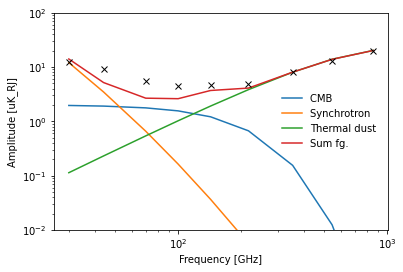

In [10]:
# Plot cmb, synchrotron, dust and total signal
def plot_func(cmb_values, synch_values, dust_values, data_values, linestyle="-", tag=""):
    plt.plot(freq.T, cmb_values, label = "CMB "+tag, linestyle=linestyle, color="C0",)
    plt.plot(freq.T, synch_values, label = "Synchrotron "+tag, linestyle=linestyle,color="C1",)
    plt.plot(freq.T, dust_values, label = "Thermal dust "+tag, linestyle=linestyle,color="C2",)
    plt.plot(freq.T, data_values, label = "Sum fg. "+tag, linestyle=linestyle,color="C3",)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Frequency [GHz]")
    plt.ylabel("Amplitude [uK_RJ]")
    plt.ylim(1e-2,1e2)
    plt.legend(loc="best", frameon=False)

plot_func(cmb, synch, dust, data)
#Data points for task 1.2:
plt.plot(freq, [12.2, 9.0, 5.4, 4.5, 4.7, 4.8, 8.2, 13.1, 19.3], 'kx')
plt.show()

## Load in the Data

To begin let us load in our simulated sky maps.

We define our data model as:

$d_{\nu} = s_{\nu} + n_{\nu}$

In [ ]:
import healpy as hp

## Component Amplitude Sampling

Begging with t